In [1]:
## CODE IDEAS FOR HOMEWORK #3: SENTIMENT ANALYSIS
# DATA NEEDED: Two datasets of tweets, as follows: 
# The training set is an annotated corpus with sentiment related to Airline Services
# from the Kaggle competition website (https://www.kaggle.com/crowdflower/twitter-airline-sentiment)
# The test dataset is about Coronavirus and has no annotation
# the IEEE data portal (https://ieee-dataport.org/open-access/free-dataset-newsmessage-boardsblogs-about-coronavirus-4-month-data-52m-posts)
# the train dataset includes a column with labeling each tweet as 'positive,' 'negative' or 'neutral'
# the test set is an unlabeled data for the classifier to predict the right label
# DATASETS AVAILABLE IN THIS LINK:
# https://sumailsyr-my.sharepoint.com/:u:/g/personal/nepalomi_syr_edu/EeUvfYcoMMZOhY249JiTuBsBwt_ZMbOQwYp5howQ3drcOw?e=1OeGeJ

# We will use 'pandas', a panel (tabular) data Python library for manipulating tables
# more info: https://en.wikipedia.org/wiki/Pandas_(software)

import pandas as pd

# We'll use 'read_csv' to read our test file, sotred as csv 
test_set = pd.read_csv('inourtime.csv')
print(test_set[:20])
len(test_set)

                                                 text
0   Everybody was drunk. The whole battery was dru...
1                                                 the
2                     road in the dark. We were going
3                    to the Champagne. The lieutenant
4   kept riding his horse out into thefields and s...
5                                 to him, Tm drunk, I
6   tellyou, mon vioux. Oh, I am so soused'. We we...
7                                        the road all
8   night in the dark and the adjutant kept riding...
9                                         and saying,
10                                                  '
11                                        You mustput
12                           it out. It is dangerous.
13  It will be observed* . We werefifty kilometres...
14                     but the adjutant worried about
15     thefire in my kitchen. It wasfunny going along
16                                that road. That was
17                     when 

4054

In [2]:
#using the Airline Services dataset for training on sentiment polarity
train_dataset = pd.read_csv('train_tweets_airlines.csv')
#displaying the dataset using pandas
display(len(train_dataset))
display(train_dataset.head(2))

14640

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)


In [3]:
# Since this is social media data, we will have to add a few extra preprocessing steps
# First, let's remove  @ and # (Twitter platform affordances) from the training data
# We'll use regular expressions for that, creating a Function that we can use to pass the data through
# NOTE: you could add more regexes to clean noisy characters such as emoticons, numbers, etc
def remove_at(x):
    x = str(x).replace('@', '')
    x = str(x).replace('#', '')
    return x

In [4]:
#applyting the clearning function and visualizing the result
train_dataset['text'] = train_dataset['text'].apply(lambda x: remove_at(x))
display(len(train_dataset))
display(train_dataset['text'].head(5))

14640

0                    VirginAmerica What dhepburn said.
1    VirginAmerica plus you've added commercials to...
2    VirginAmerica I didn't today... Must mean I ne...
3    VirginAmerica it's really aggressive to blast ...
4    VirginAmerica and it's a really big bad thing ...
Name: text, dtype: object

In [5]:
# tokenizing using RegexTokenizer for tokenizing using specific regular expressions
# in our case, we eliminate Twitter's noise by picking up only alphabets and numbers
# indicated by the 'w', the regex alias for 'word'

import nltk

tokenizer = nltk.RegexpTokenizer('\w+')
doc = train_dataset['text'].apply(lambda x : tokenizer.tokenize(x))
display(len(doc))
display(doc.head(5))

14640

0                [VirginAmerica, What, dhepburn, said]
1    [VirginAmerica, plus, you, ve, added, commerci...
2    [VirginAmerica, I, didn, t, today, Must, mean,...
3    [VirginAmerica, it, s, really, aggressive, to,...
4    [VirginAmerica, and, it, s, a, really, big, ba...
Name: text, dtype: object

In [6]:
#EXPLORATORY ANAYSIS
#Checking if the dataset is balanced
#extracting types of labels from the 'airline_sentiment' column in the dataset
PosSentences = train_dataset[train_dataset['airline_sentiment'] == 'positive']
NegSentences = train_dataset[train_dataset['airline_sentiment'] == 'negative']
NeuSentences = train_dataset[train_dataset['airline_sentiment'] == 'neutral']

#grouping all labels to find out the count for each group
label_groups = train_dataset.groupby('airline_sentiment').size().reset_index(name='counts')
display(label_groups.head(5))

,airline_sentiment,counts
0,negative,9178
1,neutral,3099
2,positive,2363


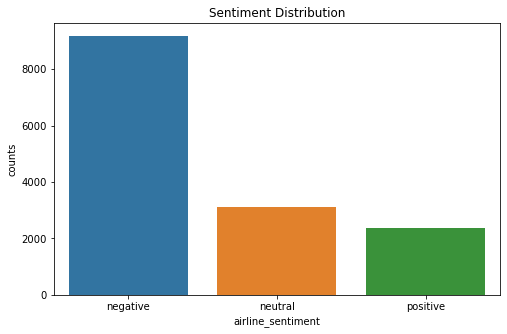

In [7]:
#Visualizing label group data within training dataset
# NOTE that the dataset is unbalanced
# please come up with strategies to balance this dataset
# if not, explain how that affect your results
# if using unbalanced dataset, please provide MicroAverage evaluation scores from your classifier

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8,5))
ax = sns.barplot(x="airline_sentiment", y="counts", data=label_groups)
ax.set_xticklabels(ax.get_xticklabels(), rotation=0)
ax.set_title(label="Sentiment Distribution")
plt.show()

In [8]:
#BEGGINING TO WORK ON THE CLASSIFICATION TASK
# extracting the tweet message and its asigned sentiment label
# we do this by creating a Python list
# our list will have the tweet's tokens and corresponding sentiments

# opening a list to store our data
docs = []

# iterating over the dataset and extracting the information sought
for i in range(0, len(train_dataset['airline_sentiment'])):
    # appending the info to the list
    docs.append((doc[i], train_dataset['airline_sentiment'][i]))

#printing the output for validation
docs[0]

(['VirginAmerica', 'What', 'dhepburn', 'said'], 'neutral')

In [9]:
    
# The dataset is sorted by sentiment label
# so we need to randomize it to avoid sampling biases 

#importing the random library
import random

#shuffling the documents
random.shuffle(docs)

In [10]:
#defining set of words that will be used for features
#we'll find the 2000 most common words and used them as an important feature of the whole corpus

all_words = [word for (sentance,category) in docs for word in sentance]
top_words = nltk.FreqDist(all_words)
most_common_words = top_words.most_common(2000)
word_features = [word for (word,count) in most_common_words]

In [11]:
#checking if we have the 2000 words we need
len(set(all_words))

18042

In [12]:
#now we will use that list of most frequent words in the entire corpus
#to iterate over each sentence and check if any of those words are present
#in that way, we will see if this unigram corpus feature is present on that particular sentence
#using Boolean logic that matches values and returns 'True' or 'False'
#we do this by defining a Python "function," i.e.a piece of code writen to be reused
def document_features(document, word_features):
    document_words = set(document)
    #we open a Pytnon dictionary instead of a list
    features = {}
    for word in word_features:
        #checking if the word from word_features matches a word in the document
        features['contains({})'.format(word)] = (word in document_words)
    return features

In [13]:
#now we apply the function to the document dataset
featuresets = [(document_features(d, word_features), c) for (d, c) in docs]

#we print the list of features matches for the first document ([0]) in the corpus
#we'll see a Python dictionary with the key being the feature word
#and the value being 'True' or 'False' according to that word being matched in the present document or not
#we'll se a lot of 'False' values because (of course) not all 2000 words will be on each sentence!
featuresets[0]

({'contains(to)': True,
  'contains(I)': False,
  'contains(the)': True,
  'contains(a)': False,
  'contains(for)': True,
  'contains(you)': False,
  'contains(united)': False,
  'contains(on)': False,
  'contains(and)': False,
  'contains(t)': False,
  'contains(flight)': False,
  'contains(my)': False,
  'contains(USAirways)': True,
  'contains(AmericanAir)': False,
  'contains(is)': True,
  'contains(in)': False,
  'contains(SouthwestAir)': False,
  'contains(JetBlue)': False,
  'contains(of)': False,
  'contains(it)': False,
  'contains(me)': False,
  'contains(that)': False,
  'contains(have)': False,
  'contains(your)': False,
  'contains(was)': False,
  'contains(s)': False,
  'contains(with)': False,
  'contains(at)': False,
  'contains(not)': False,
  'contains(can)': False,
  'contains(get)': False,
  'contains(co)': False,
  'contains(be)': False,
  'contains(from)': False,
  'contains(this)': False,
  'contains(http)': False,
  'contains(no)': False,
  'contains(but)': Fals

In [14]:
#checking the length of the list of features
len(featuresets)

14640

In [15]:
#We are ready now to do machine learning using the unigram list we just created
#we use a Naive Bayes classifier with 5-fold cross validation for training on sentiments using unigrams

import numpy as np
from sklearn.model_selection import KFold

kf = KFold(n_splits = 5)
sum = 0

for train, test in kf.split(featuresets):
    train_data = np.array(featuresets)[train]
    test_data = np.array(featuresets)[test]
    classifier = nltk.NaiveBayesClassifier.train(train_data)
    sum += nltk.classify.accuracy(classifier, test_data)

#storing the score in a variable 
acc1 = sum/5

In [16]:
#let's see the accuracy score for this unigram classifier

acc1

0.766256830601093

In [17]:
# We will now create a new feature: bigrams
#we'll use the code we already know from class labs 

from nltk.collocations import *
import re

#data cleaning and preprocessing
stopwords = nltk.corpus.stopwords.words('english')

def alpha(w):
    pattern = re.compile('^[^a-z]+$')
    if(pattern.match(w)):
        return True
    else:
        return False

#creating bigrams features for the corpus and applying cleaning steps
bigram_measures = nltk.collocations.BigramAssocMeasures()
finder = BigramCollocationFinder.from_words(all_words)
finder.apply_word_filter(alpha)
finder.apply_word_filter(lambda w: w in stopwords)
scored = finder.score_ngrams(bigram_measures.raw_freq)
scored[:10]

[(('customer', 'service'), 0.0019616017390139137),
 (('Cancelled', 'Flightled'), 0.0018871576502467822),
 (('Late', 'Flight'), 0.0009268289051507866),
 (('Cancelled', 'Flighted'), 0.0008374959986302288),
 (('Late', 'Flightr'), 0.0005769416879452687),
 (('JetBlue', 'Our'), 0.0005434418480000596),
 (('Booking', 'Problems'), 0.000539719643561703),
 (('Cancelled', 'Flight'), 0.000539719643561703),
 (('Our', 'fleet'), 0.000539719643561703),
 (('fleek', 'http'), 0.0005322752346849899)]

In [18]:
#extracting clean bigrams (no frequency information)
bigram_features = [bigram for (bigram, count) in scored[:2000]]
#printing the first 30 for confirmation
bigram_features[:30]

[('customer', 'service'),
 ('Cancelled', 'Flightled'),
 ('Late', 'Flight'),
 ('Cancelled', 'Flighted'),
 ('Late', 'Flightr'),
 ('JetBlue', 'Our'),
 ('Booking', 'Problems'),
 ('Cancelled', 'Flight'),
 ('Our', 'fleet'),
 ('fleek', 'http'),
 ('USAirways', 'AmericanAir'),
 ('Flight', 'Booking'),
 ('call', 'back'),
 ('united', 'thanks'),
 ('JetBlue', 'thanks'),
 ('gate', 'agent'),
 ('AmericanAir', 'thanks'),
 ('connecting', 'flight'),
 ('get', 'home'),
 ('flight', 'Cancelled'),
 ('last', 'night'),
 ('hours', 'Late'),
 ('USAirways', 'thanks'),
 ('hour', 'delay'),
 ('Thanks', 'united'),
 ('first', 'class'),
 ('flight', 'attendant'),
 ('reFlight', 'Booking'),
 ('united', 'yes'),
 ('help', 'united')]

In [19]:
#after finding all bigrams of the corpus (i.e. the bigram feature of the corpus)
#we create a function that checks if those feature bigrams are present on each specific document
#exactly as we did with unigrams

def bi_document_features(document, bigram_features):
    document_words = list(nltk.bigrams(document))
    features = {}
    for word in bigram_features:
        #boolean logic will retunt 'True' if there is a match, or 'False' if not
        features['contains({})'.format(word)] = (word in document_words)
    return features

In [20]:
#applying the function to our documents
featuresets2 = [(bi_document_features(d, bigram_features), c) for (d, c) in docs]

#seeing the featureset for the first document
featuresets2[0]

({"contains(('customer', 'service'))": False,
  "contains(('Cancelled', 'Flightled'))": False,
  "contains(('Late', 'Flight'))": False,
  "contains(('Cancelled', 'Flighted'))": False,
  "contains(('Late', 'Flightr'))": False,
  "contains(('JetBlue', 'Our'))": False,
  "contains(('Booking', 'Problems'))": False,
  "contains(('Cancelled', 'Flight'))": False,
  "contains(('Our', 'fleet'))": False,
  "contains(('fleek', 'http'))": False,
  "contains(('USAirways', 'AmericanAir'))": False,
  "contains(('Flight', 'Booking'))": False,
  "contains(('call', 'back'))": False,
  "contains(('united', 'thanks'))": False,
  "contains(('JetBlue', 'thanks'))": False,
  "contains(('gate', 'agent'))": False,
  "contains(('AmericanAir', 'thanks'))": False,
  "contains(('connecting', 'flight'))": False,
  "contains(('get', 'home'))": False,
  "contains(('flight', 'Cancelled'))": False,
  "contains(('last', 'night'))": False,
  "contains(('hours', 'Late'))": False,
  "contains(('USAirways', 'thanks'))": Fal

In [21]:
#checking the length of the featureset
#it should be the same than unigram, because we processed number of documents
#this is for verification
len(featuresets2)

14640

In [22]:
#how we run the classifier to see if we get a good accuracy score
#all this is just to find out which feature is more informative to predict sentiment
#Naive Bayes classifier with 5-fold cross validation for training on sentiments using bigram features

kf = KFold(n_splits = 5)
sum = 0

for train, test in kf.split(featuresets2):
    train_data2 = np.array(featuresets2)[train]
    test_data2 = np.array(featuresets2)[test]
    classifier2 = nltk.NaiveBayesClassifier.train(train_data2)
    sum += nltk.classify.accuracy(classifier2, test_data2)

acc2 = sum/5

In [23]:
#accuracy of classifier2, bigrams

acc2

0.6813524590163935

In [24]:
#Since the accuracy for unigrams is higher than bigrams, we'll use unigrams
#as a feature to train the classifier and pass the test set through it
#the test set is the Coronavirus dataset, whose tweets we want to predict sentiment 

In [25]:
# determining the sentiments of the 1/4th of the comments using classifier1
# for debugging purposes, we use only 1/100 of the corpus
# but for the final experiment you should use at least 1/4 of it
# NOTE: WITH 1/4 OF THE SAMPLE THIS CODE TAKES 2 HOURS TO RUN

#creating emply lists to append the tweets to
pos_sent = []
neg_sent = []
neu_sent = []

#now we add information extracted from the tweets
#title = []
#author = []
#country = []

#and total values of positive, negative or neutral tweets
#all these lists will end up as columns in our csv file, created later on
total_pos = []
total_neg = []
total_neu = []

#iterating over the test file of tweets we crated at the very beginning of the notebook
#PLEASE EDIT THE NUMBER OF DOCUMENTS AS MENTIONED ABOVE
for i in range(0, int(len(test_set['text'])/4)):
    #extracting the text
    sentences = nltk.sent_tokenize(test_set['text'][i])
    #opening the counter to add up positive, negative, or neutral according to predicted labels
    pos_count = 0
    neg_count = 0
    neu_count = 0
    #using our first classifier, the one trained with unigram features
    for sents in sentences:
        senti = classifier.classify(document_features(nltk.word_tokenize(sents), word_features))
        #adding items to the counter as they are classified
        if senti == 'positive':
            pos_sent.append(sents)
            pos_count += 1

        elif senti == 'negative':
            neg_sent.append(sents)
            neg_count += 1
    
        else:
            neu_sent.append(sents)
            neu_count += 1
    #appending the information from each sentence to the corresponding list       
   #title.append(test_set['title'][i])
    #author.append(test_set['author'][i])
    #country.append(test_set['country'][i])
    #appending the totals
    total_pos.append(pos_count)
    total_neg.append(neg_count)
    total_neu.append(neu_count)

In [26]:
len(test_set)/4

1013.5

In [27]:
#how many positive sentiment sentences did we predict?
len(pos_sent)

874

In [28]:
(661/1013.5)*100

65.21953626048347

In [29]:
#what about neutral?
len(neu_sent)

479

In [30]:
(688/1013.5)*100

67.88357178095707

In [31]:
#and how many negative sentiment ones?
len(neg_sent)

49

In [32]:
(53/1013.5)*100

5.229403058707449

In [33]:
#WE ARE DONE WITH PREDICTIONS
#WE WILL ZOOM IN ON INFORMATIVE FEATURES ACCORDING TO PART OF SPEECH TAGS
#FOCUSING ON ADJECTIVES, ADVERBS, NOUNS AND VERBS

In [34]:
#We tokenize and attach POS to each sentence in the Positive Sentences list

tokens_pos = [nltk.word_tokenize(sent) for sent in pos_sent]
tags_pos = [nltk.pos_tag(token) for token in tokens_pos]

In [35]:
#same for Negative Sentences

tokens_neg = [nltk.word_tokenize(sent) for sent in neg_sent]
tags_neg = [nltk.pos_tag(token) for token in tokens_neg]

In [36]:
#let's check that everything is okay. We print the first 3 Negative sentences
print(tags_neg[:3])

[[('Then', 'RB'), ('they', 'PRP'), ('went', 'VBD'), ('into', 'IN'), ('the', 'DT'), ('woods', 'NNS'), ('and', 'CC'), ('fol\x02lowed', 'VBD'), ('a', 'DT'), ('trail', 'NN'), ('that', 'WDT'), ('led', 'VBD'), ('to', 'TO'), ('the', 'DT'), ('logging', 'VBG'), ('road', 'NN'), ('that', 'WDT'), ('ran', 'VBD'), ('back', 'RB'), ('into', 'IN')], [('had', 'VBD'), ('been', 'VBN'), ('trying', 'VBG'), ('to', 'TO'), ('have', 'VB'), ('her', 'PRP$'), ('baby', 'NN'), ('for', 'IN'), ('two', 'CD'), ('days', 'NNS'), ('.', '.')], [('moved', 'VBD'), ('off', 'RP'), ('up', 'IN'), ('the', 'DT'), ('road', 'NN'), ('to', 'TO'), ('sit', 'VB'), ('in', 'IN'), ('the', 'DT'), ('dark', 'NN'), ('and', 'CC'), ('smoke', 'VBD'), ('out', 'IN'), ('of', 'IN')]]


In [37]:
#what about the first 3 positive ones...
print(tags_pos[:3])

[[('Everybody', 'NN'), ('was', 'VBD'), ('drunk', 'VBN'), ('.', '.')], [('The', 'DT'), ('whole', 'JJ'), ('battery', 'NN'), ('was', 'VBD'), ('drunk', 'JJ'), ('going', 'VBG'), ('along', 'IN')], [('the', 'DT')]]


In [38]:
# CREATING FUNCTIONS TO REUSE CODE FOR RETRIEVING DIFFERENTE TYPES OF PHRASES

# We will apply this code to find ADJECTIVE PHRASES positive and negative sentences first
# after that, you will need to change the grammar and subtree label in the function to extract:
# ADVERB, NOUN, and VERB phrases, as stated in the Homework guidelines

# EXTRACTING ACCORDING TO A GRAMMAR ADJECTIVE PHRASES
# this is the code we reuse, passing the "tags_pos", "tags_neg" or "tags_neu" accordingly
def grammar_phrases(tags_sent):
    grammar_adjph = "ADJPH: {<RB.?>+<JJ.?>}" # REMEMBER TO EDI THIS GRAMMAR FOR ADVERBS & VERBS!
    chunk_parser_adj = nltk.RegexpParser(grammar_adjph)
    adjph_tags = []
    for sent in tags_sent:
        if len(sent) > 0:
            tree = chunk_parser_adj.parse(sent)
            for subtree in tree.subtrees():
                if subtree.label() == 'ADJPH': # THIS ALSO NEEDS EDITION FOR ADVERBS & VERBS
                    adjph_tags.append(subtree)
    return adjph_tags


# EXTRACTING ADJECTIVE PHRASES without POS tags, just the phrase
# we also reuse this but replacing the 'tagged_phrase' in each new case
def word_phrase(tagged_phrase):
    adjective_phrases = []
    for sent in tagged_phrase:
        temp = ''
        for w, t in sent:
            temp += w+ ' '    
        adjective_phrases.append(temp)
    return adjective_phrases


# RANKING BY FREQUENCY
# this is also a function to reuse
def get_frequency(phrases):
    phrases_frequency = nltk.FreqDist(phrases)
    return phrases_frequency.most_common(50)


In [39]:
# EXTRACTING POSITIVE PHRASES AND THEIR POS
adjph_pos = grammar_phrases(tags_pos)
print('Adjective phrases in positive sentences, with POS: ', adjph_pos[:3])

# EXTRACTING POSITIVE ADJECTIVE PHRASES (WORDS ONLY)
word_adjph_pos = word_phrase(adjph_pos)
print('First 10 adjective phrases in positive sentences: ', word_adjph_pos[:10])

# RANKING POSITIVE PHRASES BY FREQUENCY
most_common_adjph_pos = get_frequency(word_adjph_pos)
print("Top 50 adjective phrases in positive sentences: ", most_common_adjph_pos)

Adjective phrases in positive sentences, with POS:  [Tree('ADJPH', [('very', 'RB'), ('big', 'JJ')]), Tree('ADJPH', [('very', 'RB'), ('bad', 'JJ')]), Tree('ADJPH', [('very', 'RB'), ('pale', 'JJ')])]
First 10 adjective phrases in positive sentences:  ['very big ', 'very bad ', 'very pale ', 'away wet ', 'terribly sorry ', 'very exceptional ', 'very many ', 'very lazy ', 'very serious ', 'so much ']
Top 50 adjective phrases in positive sentences:  [('absolutely perfect ', 2), ('very big ', 1), ('very bad ', 1), ('very pale ', 1), ('away wet ', 1), ('terribly sorry ', 1), ('very exceptional ', 1), ('very many ', 1), ('very lazy ', 1), ('very serious ', 1), ('so much ', 1), ('awfully surprised ', 1), ("n't striking ", 1), ('afrightfully hot ', 1), ('simply priceless ', 1), ('pretty good ', 1), ("'How much ", 1), ('consciously practical ', 1), ('quite proud ', 1), ('thoroughly practical ', 1), ('awfully big ', 1), ('very fine ', 1), ('very wise ', 1), ("n't drunk ", 1)]


In [40]:
# NOW, YOUR TURN!!
# USE THESE FUNCTIONS TO EXTRACT NEGATIVE PHRASES, CLEAN NEGATIVE ADJECTIVE PHRASES FROM POS,
# AND RANK NEGATIVE PHRASES BY FREQUENCY

# YOU ALSO NEED TO MODIFY THE GRAMMAR TO LOOK FOR:
# NOUNS
# VERBS
## IN BOTH CASES, DON'T FORGET THAT THERE ARE MANY TAGS IN EACH GROUP!!
##  CHECK THE PENN POS TAGS LIST: https://www.ling.upenn.edu/courses/Fall_2003/ling001/penn_treebank_pos.html



In [41]:
#we are ready to start preparing our csv file
#we first create a table using a pandas' dataframe
#to assign columns for the information extracted from each tweet
#namely title, author and country, along with and number of sentences stores before in our lists

df = pd.DataFrame(list(zip(total_pos, total_neg, total_neu)), 
                       columns = ['n_pos_sents', 'n_neg_sents', 'n_neu_sents'])

In [42]:
#printing the dataframe, to confirm everything is fine
df

,n_pos_sents,n_neg_sents,n_neu_sents
0,2,0,0
1,1,0,0
2,2,0,0
3,1,0,1
4,1,0,0
...,...,...,...
1008,0,0,1
1009,1,0,1
1010,1,0,1
1011,0,0,2


In [43]:
#we now finally save our table in a csv file

df.to_csv('my_hemingway.csv', index = False)

In [44]:
#checking some of the ouptut: the first three sentences labeled as positive
pos_sent[:3]

['Everybody was drunk.', 'The whole battery was drunk going along', 'the']

In [45]:
#now the first 3 sentences labeled as negative
neg_sent[:3]

['Then they went into the woods and fol\x02lowed a trail that led to the logging road that ran back into',
 'had been trying to have her baby for two days.',
 'moved off up the road to sit in the dark and smoke out of']

In [46]:
#and finally the neutral ones
neu_sent[:3]

['to the Champagne.', 'to him, Tm drunk, I', "Oh, I am so soused'."]

In [47]:
#PLEASE OPEN THE NEWLY CREATED CSV FILE TO CHECK EVERYTHING IS FINE
#DO NOT FORGE TO EXPLAIN THE OUTPUTS IN YOUR REPORT